In [2]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from matplotlib import pyplot as plt
import pandas as pd

from IPython.display import Image
plt.rcParams["font.size"] = 18 #matplotlib.
%matplotlib inline

In [9]:
#after the lens, lens is origin
position = np.array([9,21,33.5])* 25.4/1000    #,46
wx = np.array([3586,3321,3166])*1e-6/2#,2191
wy = np.array([3420,3325,3032])*1e-6/2#,2821

lam = 1064e-9

Horizontal    Vertical     Average
Beam waist radius[um]    861.947651  901.045102  881.496377
Waist position [m]         4.201773    4.147095    4.174434
Rayleigh range [inches]   86.364708   94.377309   90.371008

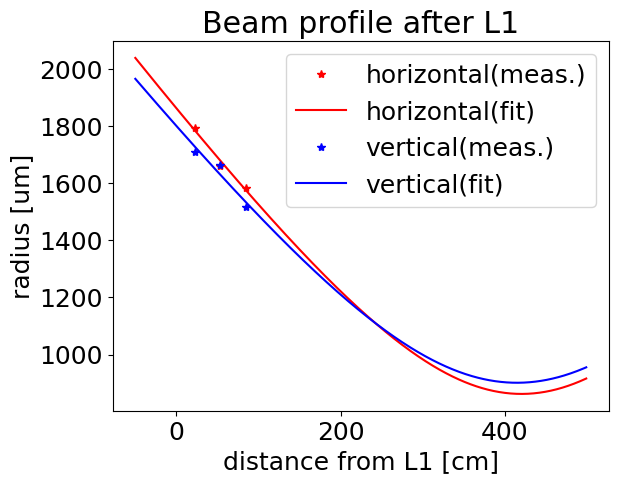

In [19]:
def gaussian_beam(z,w0,z0):
    M=1
    zr = np.pi*w0**2/lam
    w = w0*np.sqrt(1+M**4*((z-z0)/zr)**2)
    return w

init_w0 = 400e-6
wx_popt,_ = curve_fit(gaussian_beam, position, wx,
                             p0=[init_w0, 0.])
wy_popt,_ = curve_fit(gaussian_beam, position, wy,
                             p0=[init_w0, 0.])

zr_x = np.pi*wx_popt[0]**2/lam
zr_y = np.pi*wy_popt[0]**2/lam

pp = np.arange(-.5,5,0.01)

fig = plt.figure()
plt.plot(position*100,wx*1e6,'*',label='horizontal(meas.)',c='red')
plt.plot(pp*100,gaussian_beam(pp,*wx_popt)*1e6,label='horizontal(fit)',c='red')
plt.plot(position*100,wy*1e6,'*',label='vertical(meas.)',c='blue')
plt.plot(pp*100,gaussian_beam(pp,*wy_popt)*1e6,label='vertical(fit)',c='blue')
plt.legend()
plt.xlabel('distance from L1 [cm]')
plt.ylabel('radius [um]')
plt.title('Beam profile after L1')
plt.savefig('./beam_profile.png')

display(pd.DataFrame([[wx_popt[0]*1e6,wy_popt[0]*1e6,(wx_popt[0]*1e6+wy_popt[0]*1e6)/2],[wx_popt[1],wy_popt[1],(wx_popt[1]+wy_popt[1])/2],[zr_x/0.0254,zr_y/0.0254,(zr_x/0.0254+zr_y/0.0254)/2]],
                    index = ['Beam waist radius[um]','Waist position [m]','Rayleigh range [inches]'],
                    columns = ['Horizontal', 'Vertical','Average']))

# Coming out of the laser

In [21]:
#coming out of the laser with the laser output as origin
position = np.array([1, 6, 16, 24])* 25.4/1000    
wx = np.array([1532, 1893, 2643, 3187])*1e-6/2
wy = np.array([1444,1803, 2579, 3103])*1e-6/2

lam = 1064e-9

Horizontal    Vertical
Beam waist radius[um]    232.558866  230.575836
Waist position [m]        -0.478302   -0.443455
Rayleigh range [inches]    6.286955    6.180194

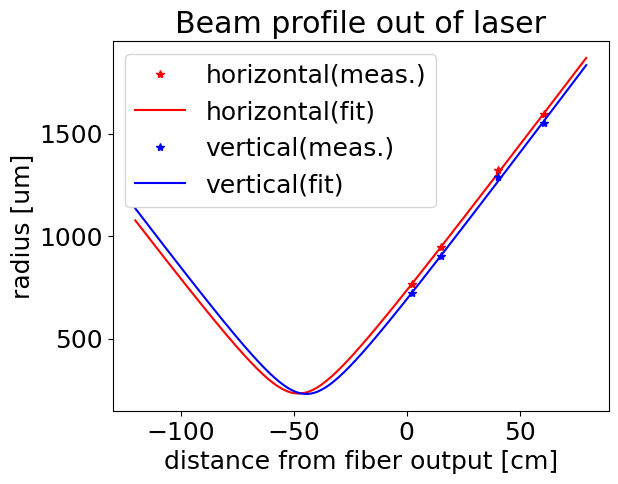

In [23]:
def gaussian_beam(z,w0,z0):
    M=1
    zr = np.pi*w0**2/lam
    w = w0*np.sqrt(1+M**4*((z-z0)/zr)**2)
    return w

init_w0 = 400e-6
wx_popt,_ = curve_fit(gaussian_beam, position, wx,
                             p0=[init_w0, 0.])
wy_popt,_ = curve_fit(gaussian_beam, position, wy,
                             p0=[init_w0, 0.])

zr_x = np.pi*wx_popt[0]**2/lam
zr_y = np.pi*wy_popt[0]**2/lam

pp = np.arange(-1.2,.8,0.005)

fig = plt.figure()
plt.plot(position*100,wx*1e6,'*',label='horizontal(meas.)',c='red')
plt.plot(pp*100,gaussian_beam(pp,*wx_popt)*1e6,label='horizontal(fit)',c='red')
plt.plot(position*100,wy*1e6,'*',label='vertical(meas.)',c='blue')
plt.plot(pp*100,gaussian_beam(pp,*wy_popt)*1e6,label='vertical(fit)',c='blue')
plt.legend()
plt.xlabel('distance from fiber output [cm]')
plt.ylabel('radius [um]')
plt.title('Beam profile out of laser')
#plt.savefig('./PMC.png')

display(pd.DataFrame([[wx_popt[0]*1e6,wy_popt[0]*1e6],[wx_popt[1],wy_popt[1]],[zr_x/0.0254,zr_y/0.0254]],
                    index = ['Beam waist radius[um]','Waist position [m]','Rayleigh range [inches]'],
                    columns = ['Horizontal', 'Vertical']))